In [170]:
#João Farias, nmec. 124964
import numpy as np
import matplotlib.pyplot as plt
import math
m= 0.5
k = 2
b=0.2
x0= 2
v0x= 2

In [171]:
N=100000
tfinal=30
xt= np.empty(N)
xt[0]=x0
vxt= np.empty(N)
vxt[0]=v0x
t = np.empty(N)
t[0] = 0

maximum = []

dt=tfinal/N

In [172]:
def maxminv(x0,x1,x2,y0,y1,y2):
 # Máximo ou mínimo usando o polinómio de Lagrange
 # Dados (input): (x0,y0), (x1,y1) e (x2,y2)
 # Resultados (output): xm, ymax
 xab=x0-x1
 xac=x0-x2
 xbc=x1-x2
 a=y0/(xab*xac)
 b=-y1/(xab*xbc)
 c=y2/(xac*xbc)
 xmla=(b+c)*x0+(a+c)*x1+(a+b)*x2
 xm=0.5*xmla/(a+b+c)
 xta=xm-x0
 xtb=xm-x1
 xtc=xm-x2
 ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
 return xm, ymax

In [173]:
def eulercromer():
    for i in range(N-1):
        ax=-(k*xt[i] + b*vxt[i])/m
        
        vxt[i+1]=vxt[i]+ax*dt
        xt[i+1]=xt[i]+vxt[i+1]*dt
        
        t[i+1]= t[i] + dt

        if xt[i-1] < xt[i] > xt[i+1]:
            t0, t1, t2 = (i-1)*dt, i*dt, (i+1)*dt
            y0, y1, y2 = xt[i-1], xt[i], xt[i+1]
            xm, xmax = maxminv(t0, t1, t2, y0, y1, y2)
            maximum.append([xm, xmax])
        
    return
eulercromer()

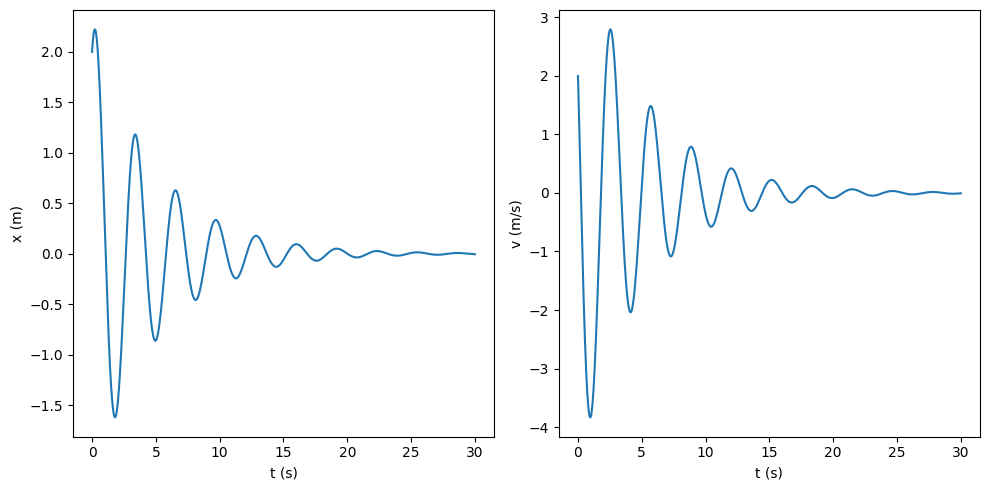

In [174]:
figure, axis = plt.subplots(1,2, figsize=(10,5))
axis[0].plot(t, xt, linestyle="-")
axis[0].set_xlabel("t (s)")
axis[0].set_ylabel("x (m)")
axis[1].plot(t, vxt, linestyle="-")
axis[1].set_xlabel("t (s)")
axis[1].set_ylabel("v (m/s)")
figure.tight_layout()

In [175]:
print("Os primeiro quatro máximos locais são: " + str(maximum[0][1]) + " m;" + str(maximum[1][1]) + " m;" + str(maximum[2][1]) + " m;" + str(maximum[3][1]) + " m;")

Os primeiro quatro máximos locais são: 2.222430650349709 m;1.1818706425417476 m;0.6285092475094086 m;0.3342361337934922 m;


In [176]:
#b) Como podemos observar, visto que o movimento é amortecido, os máximos diminuem com o tempo, o expectável de um movimento como este.

In [177]:
def calculate_period():
    for i in range(1, len(maximum)):
        period_list.append(maximum[i][0]-maximum[i-1][0])
    estimated_period= (sum(period_list)/len(period_list))
    return estimated_period
T = calculate_period()

In [178]:
f = 1/T
print("c) A frequência de oscilação do corpo é, aproximadamente, " + str(f) + " rad/s")

c) A frequência de oscilação do corpo é, aproximadamente, 0.31672374877793724 rad/s
